# **Generating Data - Simple Plots and Statistics**

In [1]:
import numpy as np # Numeric Arrays
import pandas as pd # Series and Dataframes
import scipy as sp # Scientific imports
import scipy.stats as st # Statistical Distributions
import statsmodels.api as sm # Statsmodels

# from fxy.a import * -- convenience import

In [2]:
class Entity():
    pass

my = Entity()

## **Random Draw (Sampling from a Population)**

In [3]:
# Let's say we have a population
my.population = np.arange(1, 15, 1)

In [4]:
my.population

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [5]:
# Random Sampling with Replacement:
sp.random.choice(my.population, size=10, replace=True, p=None)

array([ 6,  3,  6, 14,  6,  5, 14,  4, 14,  2])

In [6]:
# Random Sampling without Replacement:
sp.random.choice(my.population, size=10, replace=False, p=None)

array([ 8,  4,  3,  5, 13, 10, 11, 14,  7, 12])

In [7]:
# Random Sampling according to a Set of Probabilities (multinomial)
probs = [0.4, 0.3, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0];
np.random.choice(my.population, size=10, replace=True, p=probs)

array([1, 2, 2, 2, 2, 3, 2, 4, 3, 2])

## **Sampling from Distributions**

In [8]:
# Drawing 10 items from Normal distribution with mean=5 and sd=2
np.random.seed(10)
2*np.random.randn(10)+5

array([7.66317301, 6.43055795, 1.90919942, 4.9832323 , 6.24267195,
       3.55982888, 5.53102317, 5.21709705, 5.00858286, 4.65079958])

In [9]:
sp.random.seed(10)
sp.random.normal(5,2,10)

array([7.66317301, 6.43055795, 1.90919942, 4.9832323 , 6.24267195,
       3.55982888, 5.53102317, 5.21709705, 5.00858286, 4.65079958])

In [10]:
# Generating DataFrame of random variable instantiations
my.rvi = pd.DataFrame({'Laplace': sp.random.laplace(0,1,100),
                'Poisson': sp.random.poisson(1,100),
                'Uniform': sp.random.uniform(0,3,100),
                'Bernoulli': st.bernoulli.rvs(0.5,size=100)})
my.rvi.head()

Laplace  Poisson   Uniform  Bernoulli
0  0.981475        0  1.446216          1
1  0.254960        0  1.586562          1
2  0.586107        0  2.088925          1
3 -0.538279        0  0.614285          1
4  1.805138        1  2.014117          0

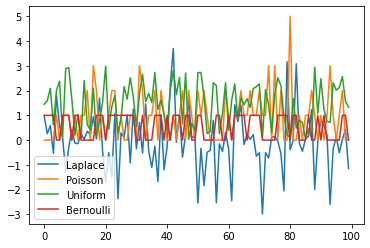

In [11]:
# Visualizing the variables
my.rvi.plot();

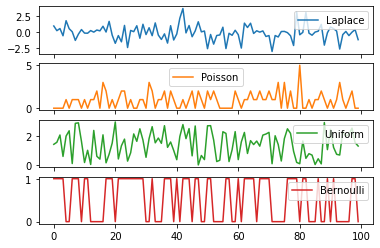

In [12]:
# Visualizing variables separately
my.rvi.plot(subplots=True);

## **Constructing data according to Laws**

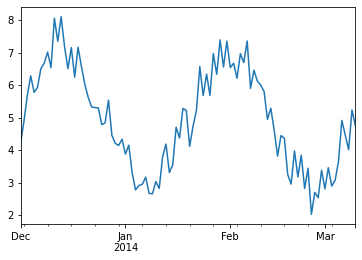

In [13]:
# Series of addition f Normal distribution with mean=5, sd=0.5 to a 2*sine(x) function
my.series = pd.Series(
    data=2*np.sin(np.linspace(0,4*np.pi,100))+(0.5*np.random.randn(100)+5),
    index=pd.date_range('2013-12-01',periods=100,freq='D')
)

my.series.plot();

## **Finding CDF and PDF values**

In [14]:
# Normal Distribution PDF
st.norm.pdf(0)

0.3989422804014327

In [15]:
# Normal Distribution CDF
st.norm.cdf(0)

0.5

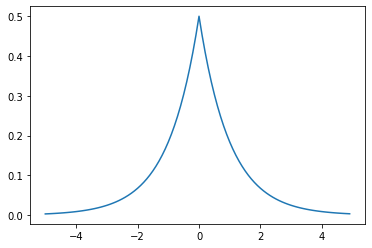

In [16]:
# Plotting Laplace Density:
x_vals = np.arange(-5,5,0.1)
y_vals = st.laplace.pdf(x_vals,0)

pd.Series(y_vals, x_vals).plot();

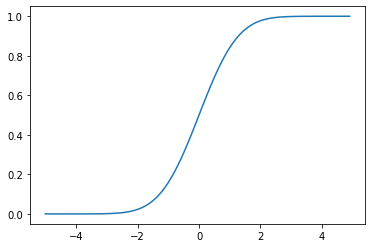

In [17]:
# Plotting Normal distribution: X ~ N(0,1) CDF
pd.Series(st.norm.cdf(x_vals, 0, 1), x_vals).plot();

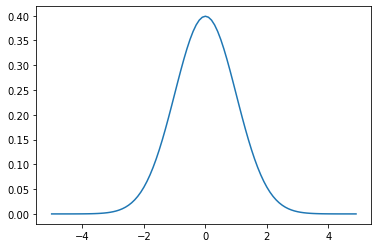

In [18]:
# Plotting Normal distribution: X ~ N(0,1) PDF
pd.Series(st.norm.pdf(x_vals, 0, 1), x_vals).plot();

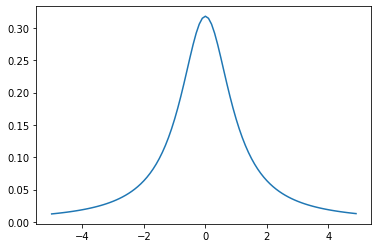

In [19]:
# Let's also draw Cauchy distribution.
pd.Series(st.cauchy.pdf(x_vals,0),x_vals).plot();

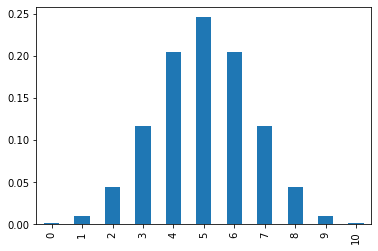

In [20]:
# Plotting Binomial probabilities: X ~ Binom(k,10,0.5)       # â†™ Note: (0, 11, 1), not (0, 10, 1)
k_vals = np.arange(0, 11, 1) 
f_vals = pd.Series(st.binom.pmf(k_vals, 10, 0.5), k_vals)
pd.Series(f_vals, k_vals).plot(kind='bar');

In [21]:
# The binomial probabilities should sum to one.
f_vals.sum()

1.0000000000000009

## **Plotting a Correlation Matrix**

In [22]:
import statsmodels.api as sm

In [23]:
my.rvi.corr()

Laplace   Poisson   Uniform  Bernoulli
Laplace    1.000000 -0.065446 -0.020379   0.132393
Poisson   -0.065446  1.000000  0.039870  -0.128527
Uniform   -0.020379  0.039870  1.000000   0.108047
Bernoulli  0.132393 -0.128527  0.108047   1.000000

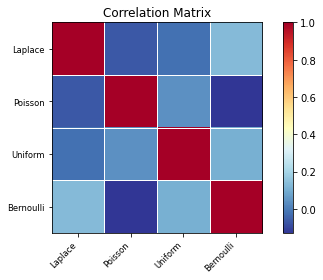

In [24]:
sm.graphics.plot_corr(my.rvi.corr(), xnames=list(my.rvi.columns));